molto bene


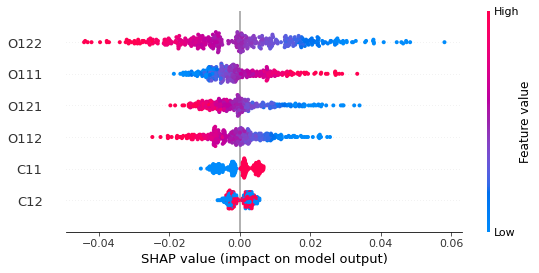

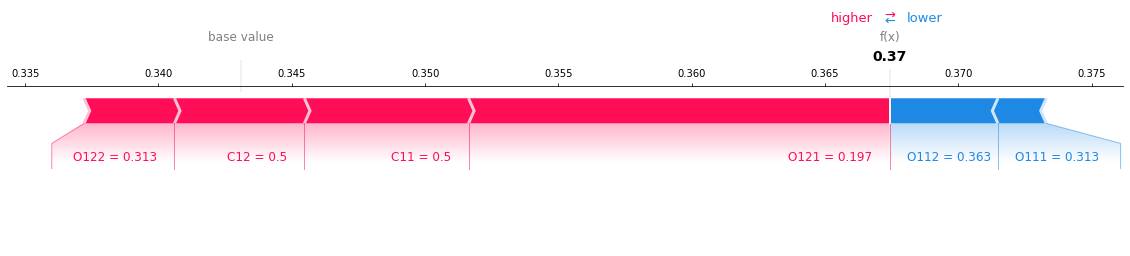

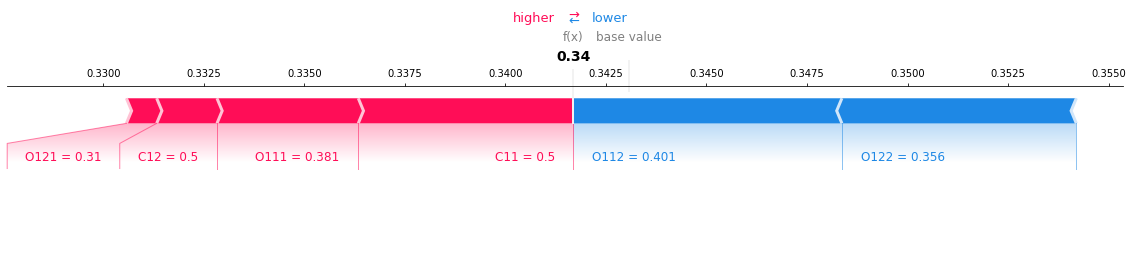

In [2]:
import pandas as pd
import numpy as np
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


np.random.seed(2)

df= pd.read_csv('lidija2-NN3.csv', header=None)
#df.columns= ['O121', 'O122', 'C12', 'O131', 'O132', 'C13', 'O211', 'O212', 'C21', 'O231', 'O232', 'C23', 'O311', 'O312', 'C31', 'O321', 'O322', 'C32', 'predict']
df.columns= ['O111', 'O112', 'C11', 'O121', 'O122', 'C12', 'predict']

# target variable is 'predict' 
Y= df['predict']

X= df.iloc[:,:-1]  # X = all rows and all columns but the last one

# split into training and test sets

X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state= 2)

# build the model

model= xgb.XGBRegressor(
    n_estimators= 100,
    objective= 'reg:squarederror',
    learning_rate= 0.2,
    subsample= 0.7,
    max_depth= 4
)
model.fit(X_train, y_train)

explainer= shap.TreeExplainer(model)
shap_values= explainer.shap_values(X_test)
shap.initjs()
#shap.summary_plot(shap_values, X_test, plot_type= "bar")
shap.summary_plot(shap_values, X_test, show=False)
plt.savefig('global.jpg')


# Get the predictions and put them with the test data.
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(model.predict(X_output),2)

# force plot of feature vector 0
sel=0
shap_plot= shap.force_plot(explainer.expected_value, 
                           shap_values[sel], features= X_test.iloc[sel,:],
                           feature_names= X_test.columns[0:6],
                           matplotlib= True, show=False, plot_cmap=['#77dd77', '#f99191']) 
plt.savefig('v0-3.jpg')

# force plot of feature vector 63
sel= 63
shap_plot= shap.force_plot(explainer.expected_value, 
                           shap_values[sel], features= X_test.iloc[sel,:],
                           feature_names= X_test.columns[0:6],
                           matplotlib= True, show=False, plot_cmap=['#77dd77', '#f99191'])
plt.savefig('v63-3.jpg')


print('molto bene')


# New Section

In [1]:
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.8 MB/s 


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 15.7 MB/s 
